In [ ]:
'''
 * Copyright (c) 2019 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Understanding Large Language Models

## Chapter 1: Fundamental Concepts and Architecture

---

### 1.1 Introduction to Large Language Models

Large Language Models (LLMs) represent a revolutionary advancement in Natural Language Processing (NLP). These deep neural network models have transformed our approach to language understanding and generation tasks.

**Key Characteristics:**
- Built on transformer architecture
- Trained on vast quantities of text data
- Capable of understanding context and generating coherent text
- Excel at complex language tasks that previous models struggled with

---

### 1.2 Evolution from Traditional NLP

#### Traditional NLP Limitations

Previous NLP methods excelled at:
- Email spam classification
- Simple pattern recognition
- Rule-based categorization

But struggled with:
- Complex instruction parsing
- Contextual analysis
- Coherent text generation
- Creative writing tasks

#### The LLM Revolution

Modern LLMs can perform tasks that were previously impossible:

```python
# Example: Traditional approach vs LLM approach
# Traditional: Rule-based email classification
def traditional_spam_classifier(email_text):
    spam_words = ['free', 'winner', 'urgent', 'click now']
    spam_score = sum(1 for word in spam_words if word in email_text.lower())
    return spam_score > 2

# LLM approach: Context-aware understanding
# "Generate a professional email from keywords: meeting, Tuesday, project update"
# LLM Output: "Dear Team, I hope this email finds you well. I wanted to schedule 
# a meeting for Tuesday to discuss our latest project update..."
```

---

### 1.3 The Transformer Architecture

The transformer architecture, introduced in "Attention Is All You Need" (Vaswani et al., 2017), forms the backbone of modern LLMs.

#### Key Components

**1. Self-Attention Mechanism**

The attention mechanism allows the model to focus on different parts of the input sequence:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Where:
- $Q$ = Query matrix
- $K$ = Key matrix  
- $V$ = Value matrix
- $d_k$ = Dimension of key vectors

**2. Multi-Head Attention**

Multiple attention heads capture different types of relationships:

$$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O$$

$$\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$$

**3. Position Encoding**

Since transformers lack inherent sequence order understanding, positional encodings are added:

$$PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)$$

$$PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)$$

---

### 1.4 Mathematical Foundations

#### Token Embedding

Input tokens are converted to dense vector representations:

$$\mathbf{e}_i = \text{Embedding}(\text{token}_i) \in \mathbb{R}^{d_{model}}$$

#### Layer Normalization

Applied before each sub-layer:

$$\text{LayerNorm}(\mathbf{x}) = \gamma \odot \frac{\mathbf{x} - \mu}{\sigma} + \beta$$

Where:
- $\mu = \frac{1}{d}\sum_{i=1}^{d} x_i$ (mean)
- $\sigma = \sqrt{\frac{1}{d}\sum_{i=1}^{d} (x_i - \mu)^2}$ (standard deviation)

#### Feed-Forward Networks

Each transformer layer contains a position-wise feed-forward network:

$$\text{FFN}(\mathbf{x}) = \text{ReLU}(\mathbf{x}W_1 + b_1)W_2 + b_2$$

---

### 1.5 Training Process

#### Pre-training Objective

LLMs are typically trained using next-token prediction:

$$\mathcal{L} = -\sum_{t=1}^{T} \log P(x_t | x_1, x_2, ..., x_{t-1}; \theta)$$

Where $\theta$ represents model parameters.

#### Autoregressive Generation

During inference, tokens are generated sequentially:

$$P(\mathbf{x}) = \prod_{t=1}^{T} P(x_t | x_1, ..., x_{t-1})$$

---

### 1.6 Key Innovations

#### Scalability

Model performance improves with:
- **Parameters**: From millions to billions/trillions
- **Data**: From gigabytes to terabytes of text
- **Compute**: Distributed training across multiple GPUs/TPUs

#### Emergent Capabilities

Large models exhibit unexpected abilities:
- Few-shot learning
- Chain-of-thought reasoning  
- Code generation
- Mathematical problem solving

---

### 1.7 Implementation Plan: Building an LLM from Scratch

#### Phase 1: Data Preparation
```python
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=512):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        tokens = self.tokenizer.encode(text)[:self.max_length]
        return torch.tensor(tokens, dtype=torch.long)
```

#### Phase 2: Model Architecture
```python
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        self.d_model = d_model
        self.n_heads = n_heads
        self.d_k = d_model // n_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def forward(self, x, mask=None):
        batch_size, seq_len, d_model = x.shape
        
        # Linear projections
        Q = self.W_q(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        K = self.W_k(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        V = self.W_v(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        
        # Transpose for attention computation
        Q = Q.transpose(1, 2)  # (batch_size, n_heads, seq_len, d_k)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        
        if mask is not None:
            scores.masked_fill_(mask == 0, -1e9)
        
        attention_weights = torch.softmax(scores, dim=-1)
        context = torch.matmul(attention_weights, V)
        
        # Concatenate heads
        context = context.transpose(1, 2).contiguous().view(
            batch_size, seq_len, d_model
        )
        
        return self.W_o(context)
```

#### Phase 3: Training Loop
```python
def train_llm(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    
    for batch in dataloader:
        optimizer.zero_grad()
        
        inputs = batch[:, :-1].to(device)  # All tokens except last
        targets = batch[:, 1:].to(device)  # All tokens except first
        
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(dataloader)
```

---

### 1.8 Challenges and Considerations

#### Computational Requirements

Training large models requires:
- **Memory**: Storing billions of parameters
- **Compute**: Massive parallel processing
- **Time**: Weeks or months of training

#### Evaluation Metrics

Common evaluation approaches:
- **Perplexity**: $\text{PPL} = 2^{H(p)}$ where $H(p)$ is cross-entropy
- **BLEU Score**: For translation tasks
- **Human Evaluation**: For generation quality

---

### 1.9 Future Directions

#### Efficiency Improvements
- Model compression techniques
- Efficient attention mechanisms (sparse attention)
- Knowledge distillation

#### Multimodal Capabilities
- Vision-language models
- Audio processing integration
- Cross-modal understanding

---

### Summary

Large Language Models represent a paradigm shift in NLP, enabled by:

1. **Transformer Architecture**: Self-attention and parallel processing
2. **Scale**: Massive datasets and model parameters  
3. **Training Objectives**: Next-token prediction and self-supervision
4. **Emergent Capabilities**: Complex reasoning and generation abilities

The mathematical foundations, from attention mechanisms to training objectives, provide the theoretical framework for understanding how these models achieve their remarkable language capabilities.

---

### Mathematical Notation Reference

| Symbol | Meaning |
|--------|---------|
| $\mathbf{x}$ | Input vector/sequence |
| $\theta$ | Model parameters |
| $d_{model}$ | Model dimension |
| $d_k$ | Key dimension |
| $h$ | Number of attention heads |
| $T$ | Sequence length |
| $\odot$ | Element-wise multiplication |

---



# Understanding Large Language Models

## Chapter 1: Fundamental Concepts and Architecture

---

### 1.1 Introduction to Large Language Models

Large Language Models (LLMs) represent a revolutionary advancement in Natural Language Processing (NLP). These deep neural network models have transformed our approach to language understanding and generation tasks.

**Key Characteristics:**
- Built on transformer architecture
- Trained on vast quantities of text data
- Capable of understanding context and generating coherent text
- Excel at complex language tasks that previous models struggled with

---

### 1.2 Evolution from Traditional NLP

#### Traditional NLP Limitations

Previous NLP methods excelled at:
- Email spam classification
- Simple pattern recognition
- Rule-based categorization

But struggled with:
- Complex instruction parsing
- Contextual analysis
- Coherent text generation
- Creative writing tasks

#### The LLM Revolution

Modern LLMs can perform tasks that were previously impossible:

```python
# Example: Traditional approach vs LLM approach
# Traditional: Rule-based email classification
def traditional_spam_classifier(email_text):
    spam_words = ['free', 'winner', 'urgent', 'click now']
    spam_score = sum(1 for word in spam_words if word in email_text.lower())
    return spam_score > 2

# LLM approach: Context-aware understanding
# "Generate a professional email from keywords: meeting, Tuesday, project update"
# LLM Output: "Dear Team, I hope this email finds you well. I wanted to schedule 
# a meeting for Tuesday to discuss our latest project update..."
```

---

### 1.3 The Transformer Architecture

The transformer architecture, introduced in "Attention Is All You Need" (Vaswani et al., 2017), forms the backbone of modern LLMs.

#### Key Components

**1. Self-Attention Mechanism**

The attention mechanism allows the model to focus on different parts of the input sequence:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Where:
- $Q$ = Query matrix
- $K$ = Key matrix  
- $V$ = Value matrix
- $d_k$ = Dimension of key vectors

**2. Multi-Head Attention**

Multiple attention heads capture different types of relationships:

$$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O$$

$$\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$$

**3. Position Encoding**

Since transformers lack inherent sequence order understanding, positional encodings are added:

$$PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)$$

$$PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)$$

---

### 1.4 Mathematical Foundations

#### Token Embedding

Input tokens are converted to dense vector representations:

$$\mathbf{e}_i = \text{Embedding}(\text{token}_i) \in \mathbb{R}^{d_{model}}$$

#### Layer Normalization

Applied before each sub-layer:

$$\text{LayerNorm}(\mathbf{x}) = \gamma \odot \frac{\mathbf{x} - \mu}{\sigma} + \beta$$

Where:
- $\mu = \frac{1}{d}\sum_{i=1}^{d} x_i$ (mean)
- $\sigma = \sqrt{\frac{1}{d}\sum_{i=1}^{d} (x_i - \mu)^2}$ (standard deviation)

#### Feed-Forward Networks

Each transformer layer contains a position-wise feed-forward network:

$$\text{FFN}(\mathbf{x}) = \text{ReLU}(\mathbf{x}W_1 + b_1)W_2 + b_2$$

---

### 1.5 Training Process

#### Pre-training Objective

LLMs are typically trained using next-token prediction:

$$\mathcal{L} = -\sum_{t=1}^{T} \log P(x_t | x_1, x_2, ..., x_{t-1}; \theta)$$

Where $\theta$ represents model parameters.

#### Autoregressive Generation

During inference, tokens are generated sequentially:

$$P(\mathbf{x}) = \prod_{t=1}^{T} P(x_t | x_1, ..., x_{t-1})$$

---

### 1.6 Key Innovations

#### Scalability

Model performance improves with:
- **Parameters**: From millions to billions/trillions
- **Data**: From gigabytes to terabytes of text
- **Compute**: Distributed training across multiple GPUs/TPUs

#### Emergent Capabilities

Large models exhibit unexpected abilities:
- Few-shot learning
- Chain-of-thought reasoning  
- Code generation
- Mathematical problem solving

---

### 1.7 Implementation Plan: Building an LLM from Scratch

#### Phase 1: Data Preparation
```python
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=512):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        tokens = self.tokenizer.encode(text)[:self.max_length]
        return torch.tensor(tokens, dtype=torch.long)
```

#### Phase 2: Model Architecture
```python
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        self.d_model = d_model
        self.n_heads = n_heads
        self.d_k = d_model // n_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def forward(self, x, mask=None):
        batch_size, seq_len, d_model = x.shape
        
        # Linear projections
        Q = self.W_q(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        K = self.W_k(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        V = self.W_v(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        
        # Transpose for attention computation
        Q = Q.transpose(1, 2)  # (batch_size, n_heads, seq_len, d_k)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        
        if mask is not None:
            scores.masked_fill_(mask == 0, -1e9)
        
        attention_weights = torch.softmax(scores, dim=-1)
        context = torch.matmul(attention_weights, V)
        
        # Concatenate heads
        context = context.transpose(1, 2).contiguous().view(
            batch_size, seq_len, d_model
        )
        
        return self.W_o(context)
```

#### Phase 3: Training Loop
```python
def train_llm(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    
    for batch in dataloader:
        optimizer.zero_grad()
        
        inputs = batch[:, :-1].to(device)  # All tokens except last
        targets = batch[:, 1:].to(device)  # All tokens except first
        
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(dataloader)
```

---

### 1.8 Challenges and Considerations

#### Computational Requirements

Training large models requires:
- **Memory**: Storing billions of parameters
- **Compute**: Massive parallel processing
- **Time**: Weeks or months of training

#### Evaluation Metrics

Common evaluation approaches:
- **Perplexity**: $\text{PPL} = 2^{H(p)}$ where $H(p)$ is cross-entropy
- **BLEU Score**: For translation tasks
- **Human Evaluation**: For generation quality

---

### 1.9 Future Directions

#### Efficiency Improvements
- Model compression techniques
- Efficient attention mechanisms (sparse attention)
- Knowledge distillation

#### Multimodal Capabilities
- Vision-language models
- Audio processing integration
- Cross-modal understanding

---

### 1.9 LLM Performance Across NLP Tasks

#### Task-Specific vs. General-Purpose Models

**Traditional NLP Models:**
- Designed for specific tasks (e.g., spam detection, sentiment analysis)
- Excelled in narrow applications
- Required separate models for different tasks
- Limited transferability between domains

**Modern LLMs:**
- Demonstrate broad proficiency across multiple NLP tasks
- Single model handles diverse applications
- Transfer learning capabilities
- Emergent abilities for unseen tasks

#### Performance Improvements

LLMs have significantly enhanced performance in:

| Task Category | Traditional Approach | LLM Approach | Improvement |
|---------------|---------------------|--------------|-------------|
| Text Translation | Rule-based + Statistical | Transformer-based | Contextual fluency |
| Sentiment Analysis | Feature engineering | End-to-end learning | Nuanced understanding |
| Question Answering | Template matching | Contextual reasoning | Complex inference |
| Text Generation | Template-based | Creative synthesis | Coherent narratives |

---

### 1.10 What is a Large Language Model?

#### Definition and Core Characteristics

A Large Language Model (LLM) is a neural network designed to:
- **Understand** human-like text patterns and context
- **Generate** coherent and contextually appropriate text
- **Respond** to diverse language tasks and instructions

#### The "Large" in Large Language Model

The term "large" refers to two critical dimensions:

**1. Model Size (Parameters)**
- Modern LLMs contain billions to trillions of parameters
- Parameters are adjustable weights optimized during training
- Scale enables complex pattern recognition and generation

**2. Training Data Scale**
- Trained on massive text corpora
- Often encompassing large portions of publicly available internet text
- Diverse data sources enable broad language understanding

#### Parameter Scale Evolution

```python
# Evolution of model sizes
model_sizes = {
    "BERT-Base": 110e6,           # 110 million parameters
    "GPT-1": 117e6,               # 117 million parameters  
    "GPT-2": 1.5e9,               # 1.5 billion parameters
    "GPT-3": 175e9,               # 175 billion parameters
    "GPT-4": 1.7e12,              # ~1.7 trillion parameters (estimated)
}

import matplotlib.pyplot as plt
import numpy as np

models = list(model_sizes.keys())
sizes = [model_sizes[model]/1e9 for model in models]  # Convert to billions

plt.figure(figsize=(10, 6))
plt.bar(models, sizes, color=['skyblue', 'lightgreen', 'orange', 'red', 'purple'])
plt.ylabel('Parameters (Billions)')
plt.title('Evolution of Language Model Sizes')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

---

### 1.11 Next-Word Prediction: The Foundation of LLM Training

#### Why Next-Word Prediction?

Next-word prediction leverages the **inherent sequential nature of language** to create a self-supervised learning task that:
- Requires no manual labeling
- Captures syntactic and semantic patterns
- Enables understanding of context and dependencies
- Scales to unlimited text data

#### Mathematical Formulation

Given a sequence of words $w_1, w_2, ..., w_t$, the model learns to predict $w_{t+1}$:

$P(w_{t+1} | w_1, w_2, ..., w_t) = \text{softmax}(\mathbf{h}_t \mathbf{W} + \mathbf{b})$

Where:
- $\mathbf{h}_t$ = hidden state at time step $t$
- $\mathbf{W}$ = output projection matrix
- $\mathbf{b}$ = bias vector

#### Training Objective

The model is trained to maximize the likelihood of the correct next word:

$\mathcal{L} = -\frac{1}{T} \sum_{t=1}^{T} \log P(w_{t+1} | w_1, ..., w_t; \theta)$

#### Autoregressive Property

LLMs generate text autoregressively, where each new token depends on all previous tokens:

$P(w_1, w_2, ..., w_T) = \prod_{t=1}^{T} P(w_t | w_1, ..., w_{t-1})$

#### Implementation Example

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class NextWordPredictor(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.transformer = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(
                d_model=embed_dim,
                nhead=8,
                dim_feedforward=hidden_dim
            ),
            num_layers=6
        )
        self.output_projection = nn.Linear(embed_dim, vocab_size)
        
    def forward(self, input_ids):
        # Convert token IDs to embeddings
        embeddings = self.embedding(input_ids)
        
        # Apply transformer layers
        hidden_states = self.transformer(embeddings)
        
        # Project to vocabulary space
        logits = self.output_projection(hidden_states)
        
        return logits

# Training step example
def train_step(model, batch, optimizer, criterion):
    optimizer.zero_grad()
    
    # Input: all tokens except the last
    inputs = batch[:, :-1]
    # Target: all tokens except the first (shifted by 1)
    targets = batch[:, 1:]
    
    # Forward pass
    logits = model(inputs)
    
    # Compute loss
    loss = criterion(
        logits.view(-1, logits.size(-1)), 
        targets.view(-1)
    )
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    return loss.item()
```

#### Why This Approach Works

**1. Self-Supervision**
- No need for labeled data
- Every text sequence provides training examples
- Scales to internet-scale datasets

**2. Context Learning**
- Model learns to use context for prediction
- Captures long-range dependencies
- Develops understanding of syntax and semantics

**3. Emergent Capabilities**
- Complex reasoning emerges from simple prediction
- Task-specific abilities without explicit training
- Transfer learning across domains

#### Training Data Requirements

For effective next-word prediction, LLMs require:

$\text{Training Corpus} = \bigcup_{i=1}^{N} \text{Document}_i$

Where each document contributes multiple training examples:

$\text{Document}_i = [w_1^{(i)}, w_2^{(i)}, ..., w_{T_i}^{(i)}]$

Generates training examples:
- $(w_1^{(i)}) \rightarrow w_2^{(i)}$
- $(w_1^{(i)}, w_2^{(i)}) \rightarrow w_3^{(i)}$
- $(w_1^{(i)}, w_2^{(i)}, w_3^{(i)}) \rightarrow w_4^{(i)}$
- ...

#### Perplexity as Evaluation Metric

Model quality is often measured using perplexity:

$\text{Perplexity} = 2^{H(p)} = 2^{-\frac{1}{T}\sum_{t=1}^{T} \log_2 P(w_t | w_1, ..., w_{t-1})}$

Lower perplexity indicates better predictive performance.

```python
def calculate_perplexity(model, test_data, tokenizer):
    model.eval()
    total_loss = 0
    total_tokens = 0
    
    with torch.no_grad():
        for batch in test_data:
            inputs = batch[:, :-1]
            targets = batch[:, 1:]
            
            logits = model(inputs)
            loss = F.cross_entropy(
                logits.view(-1, logits.size(-1)),
                targets.view(-1),
                reduction='sum'
            )
            
            total_loss += loss.item()
            total_tokens += targets.numel()
    
    avg_loss = total_loss / total_tokens
    perplexity = torch.exp(torch.tensor(avg_loss))
    
    return perplexity.item()
```

---

### 1.12 From Next-Word Prediction to Language Understanding

#### Emergent Abilities

Through next-word prediction training, LLMs develop:

**Syntactic Understanding**
- Grammar and sentence structure
- Part-of-speech relationships
- Syntactic dependencies

**Semantic Knowledge**
- Word meanings and relationships
- Conceptual understanding
- World knowledge

**Pragmatic Skills**
- Context-appropriate responses
- Conversational abilities
- Task-specific behaviors

#### The Transformer Advantage

The transformer architecture enables effective next-word prediction through:

**1. Attention Mechanisms**
$\text{Attention}(Q,K,V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$

**2. Parallel Processing**
- Efficient training on long sequences
- Capture of long-range dependencies
- Scalable to large datasets

**3. Position Encoding**
- Understanding of word order
- Sequence structure preservation
- Relative position awareness

---

### Summary

Large Language Models represent a fundamental shift in NLP, characterized by:

**Key Innovations:**
1. **Scale**: Billions of parameters trained on massive text corpora
2. **Architecture**: Transformer-based design enabling parallel processing
3. **Training Paradigm**: Next-word prediction as self-supervised learning
4. **Generalization**: Single models handling diverse NLP tasks

**Next-Word Prediction Foundation:**
- Leverages sequential nature of language
- Enables self-supervised learning at scale
- Develops emergent understanding through prediction
- Captures syntactic, semantic, and pragmatic knowledge

**Transformer Architecture Benefits:**
- Attention mechanisms for context understanding
- Parallel processing for efficient training
- Scalability to internet-scale datasets
- Transfer learning across tasks and domains

The combination of transformer architecture, massive scale, and next-word prediction training has fundamentally transformed NLP, enabling the development of ChatGPT-like models that demonstrate remarkable language understanding and generation capabilities.

**Next Steps:**
In the following sections, we will implement these concepts step-by-step, building a ChatGPT-like LLM from scratch using the transformer architecture and next-word prediction training paradigm.

---

### Mathematical Notation Reference

| Symbol | Meaning |
|--------|---------|
| $\mathbf{x}$ | Input vector/sequence |
| $\theta$ | Model parameters |
| $d_{model}$ | Model dimension |
| $d_k$ | Key dimension |
| $h$ | Number of attention heads |
| $T$ | Sequence length |
| $\odot$ | Element-wise multiplication |

---



![image.png](attachment:image.png)
Fig.1 As this hierarchical depiction of the relationship between the different fields suggests, LLMs represent a specific application of deep learning techniques, leveraging their ability to process and generate human-like text. Deep learning is a specialized branch of machine learning that focuses on using multi-layer neural networks. And machine learning and deep learning are fields aimed at implementing algorithms that enable computers to learn from data and perform tasks that typically require human intelligence.

### 1.1 Introduction to Large Language Models

Large Language Models (LLMs) represent a revolutionary advancement in Natural Language Processing (NLP). These deep neural network models have transformed our approach to language understanding and generation tasks.

**Key Characteristics:**
- Built on transformer architecture
- Trained on vast quantities of text data
- Capable of understanding context and generating coherent text
- Excel at complex language tasks that previous models struggled with

---

### 1.2 Evolution from Traditional NLP

#### Traditional NLP Limitations

Previous NLP methods excelled at:
- Email spam classification
- Simple pattern recognition
- Rule-based categorization

But struggled with:
- Complex instruction parsing
- Contextual analysis
- Coherent text generation
- Creative writing tasks

#### The LLM Revolution

Modern LLMs can perform tasks that were previously impossible:

```python
# Example: Traditional approach vs LLM approach
# Traditional: Rule-based email classification
def traditional_spam_classifier(email_text):
    spam_words = ['free', 'winner', 'urgent', 'click now']
    spam_score = sum(1 for word in spam_words if word in email_text.lower())
    return spam_score > 2

# LLM approach: Context-aware understanding
# "Generate a professional email from keywords: meeting, Tuesday, project update"
# LLM Output: "Dear Team, I hope this email finds you well. I wanted to schedule 
# a meeting for Tuesday to discuss our latest project update..."
```

---

### 1.3 The Transformer Architecture

The transformer architecture, introduced in "Attention Is All You Need" (Vaswani et al., 2017), forms the backbone of modern LLMs.

#### Key Components

**1. Self-Attention Mechanism**

The attention mechanism allows the model to focus on different parts of the input sequence:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Where:
- $Q$ = Query matrix
- $K$ = Key matrix  
- $V$ = Value matrix
- $d_k$ = Dimension of key vectors

**2. Multi-Head Attention**

Multiple attention heads capture different types of relationships:

$$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O$$

$$\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$$

**3. Position Encoding**

Since transformers lack inherent sequence order understanding, positional encodings are added:

$$PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)$$

$$PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)$$

---

### 1.4 Mathematical Foundations

#### Token Embedding

Input tokens are converted to dense vector representations:

$$\mathbf{e}_i = \text{Embedding}(\text{token}_i) \in \mathbb{R}^{d_{model}}$$

#### Layer Normalization

Applied before each sub-layer:

$$\text{LayerNorm}(\mathbf{x}) = \gamma \odot \frac{\mathbf{x} - \mu}{\sigma} + \beta$$

Where:
- $\mu = \frac{1}{d}\sum_{i=1}^{d} x_i$ (mean)
- $\sigma = \sqrt{\frac{1}{d}\sum_{i=1}^{d} (x_i - \mu)^2}$ (standard deviation)

#### Feed-Forward Networks

Each transformer layer contains a position-wise feed-forward network:

$$\text{FFN}(\mathbf{x}) = \text{ReLU}(\mathbf{x}W_1 + b_1)W_2 + b_2$$

---

### 1.5 Training Process

#### Pre-training Objective

LLMs are typically trained using next-token prediction:

$$\mathcal{L} = -\sum_{t=1}^{T} \log P(x_t | x_1, x_2, ..., x_{t-1}; \theta)$$

Where $\theta$ represents model parameters.

#### Autoregressive Generation

During inference, tokens are generated sequentially:

$$P(\mathbf{x}) = \prod_{t=1}^{T} P(x_t | x_1, ..., x_{t-1})$$

---

### 1.6 Key Innovations

#### Scalability

Model performance improves with:
- **Parameters**: From millions to billions/trillions
- **Data**: From gigabytes to terabytes of text
- **Compute**: Distributed training across multiple GPUs/TPUs

#### Emergent Capabilities

Large models exhibit unexpected abilities:
- Few-shot learning
- Chain-of-thought reasoning  
- Code generation
- Mathematical problem solving

---

### 1.7 Implementation Plan: Building an LLM from Scratch

#### Phase 1: Data Preparation
```python
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=512):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        tokens = self.tokenizer.encode(text)[:self.max_length]
        return torch.tensor(tokens, dtype=torch.long)
```

#### Phase 2: Model Architecture
```python
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        self.d_model = d_model
        self.n_heads = n_heads
        self.d_k = d_model // n_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def forward(self, x, mask=None):
        batch_size, seq_len, d_model = x.shape
        
        # Linear projections
        Q = self.W_q(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        K = self.W_k(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        V = self.W_v(x).view(batch_size, seq_len, self.n_heads, self.d_k)
        
        # Transpose for attention computation
        Q = Q.transpose(1, 2)  # (batch_size, n_heads, seq_len, d_k)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        
        if mask is not None:
            scores.masked_fill_(mask == 0, -1e9)
        
        attention_weights = torch.softmax(scores, dim=-1)
        context = torch.matmul(attention_weights, V)
        
        # Concatenate heads
        context = context.transpose(1, 2).contiguous().view(
            batch_size, seq_len, d_model
        )
        
        return self.W_o(context)
```

#### Phase 3: Training Loop
```python
def train_llm(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    
    for batch in dataloader:
        optimizer.zero_grad()
        
        inputs = batch[:, :-1].to(device)  # All tokens except last
        targets = batch[:, 1:].to(device)  # All tokens except first
        
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(dataloader)
```

---

### 1.8 Challenges and Considerations

#### Computational Requirements

Training large models requires:
- **Memory**: Storing billions of parameters
- **Compute**: Massive parallel processing
- **Time**: Weeks or months of training

#### Evaluation Metrics

Common evaluation approaches:
- **Perplexity**: $\text{PPL} = 2^{H(p)}$ where $H(p)$ is cross-entropy
- **BLEU Score**: For translation tasks
- **Human Evaluation**: For generation quality

---

### 1.9 Future Directions

#### Efficiency Improvements
- Model compression techniques
- Efficient attention mechanisms (sparse attention)
- Knowledge distillation

#### Multimodal Capabilities
- Vision-language models
- Audio processing integration
- Cross-modal understanding

---

### 1.9 LLM Performance Across NLP Tasks

#### Task-Specific vs. General-Purpose Models

**Traditional NLP Models:**
- Designed for specific tasks (e.g., spam detection, sentiment analysis)
- Excelled in narrow applications
- Required separate models for different tasks
- Limited transferability between domains

**Modern LLMs:**
- Demonstrate broad proficiency across multiple NLP tasks
- Single model handles diverse applications
- Transfer learning capabilities
- Emergent abilities for unseen tasks

#### Performance Improvements

LLMs have significantly enhanced performance in:

| Task Category | Traditional Approach | LLM Approach | Improvement |
|---------------|---------------------|--------------|-------------|
| Text Translation | Rule-based + Statistical | Transformer-based | Contextual fluency |
| Sentiment Analysis | Feature engineering | End-to-end learning | Nuanced understanding |
| Question Answering | Template matching | Contextual reasoning | Complex inference |
| Text Generation | Template-based | Creative synthesis | Coherent narratives |

---

### 1.10 What is a Large Language Model?

#### Definition and Core Characteristics

A Large Language Model (LLM) is a neural network designed to:
- **Understand** human-like text patterns and context
- **Generate** coherent and contextually appropriate text
- **Respond** to diverse language tasks and instructions

#### The "Large" in Large Language Model

The term "large" refers to two critical dimensions:

**1. Model Size (Parameters)**
- Modern LLMs contain billions to trillions of parameters
- Parameters are adjustable weights optimized during training
- Scale enables complex pattern recognition and generation

**2. Training Data Scale**
- Trained on massive text corpora
- Often encompassing large portions of publicly available internet text
- Diverse data sources enable broad language understanding

#### Parameter Scale Evolution

```python
# Evolution of model sizes
model_sizes = {
    "BERT-Base": 110e6,           # 110 million parameters
    "GPT-1": 117e6,               # 117 million parameters  
    "GPT-2": 1.5e9,               # 1.5 billion parameters
    "GPT-3": 175e9,               # 175 billion parameters
    "GPT-4": 1.7e12,              # ~1.7 trillion parameters (estimated)
}

import matplotlib.pyplot as plt
import numpy as np

models = list(model_sizes.keys())
sizes = [model_sizes[model]/1e9 for model in models]  # Convert to billions

plt.figure(figsize=(10, 6))
plt.bar(models, sizes, color=['skyblue', 'lightgreen', 'orange', 'red', 'purple'])
plt.ylabel('Parameters (Billions)')
plt.title('Evolution of Language Model Sizes')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

---

### 1.11 Next-Word Prediction: The Foundation of LLM Training

#### Why Next-Word Prediction?

Next-word prediction leverages the **inherent sequential nature of language** to create a self-supervised learning task that:
- Requires no manual labeling
- Captures syntactic and semantic patterns
- Enables understanding of context and dependencies
- Scales to unlimited text data

#### Mathematical Formulation

Given a sequence of words $w_1, w_2, ..., w_t$, the model learns to predict $w_{t+1}$:

$P(w_{t+1} | w_1, w_2, ..., w_t) = \text{softmax}(\mathbf{h}_t \mathbf{W} + \mathbf{b})$

Where:
- $\mathbf{h}_t$ = hidden state at time step $t$
- $\mathbf{W}$ = output projection matrix
- $\mathbf{b}$ = bias vector

#### Training Objective

The model is trained to maximize the likelihood of the correct next word:

$\mathcal{L} = -\frac{1}{T} \sum_{t=1}^{T} \log P(w_{t+1} | w_1, ..., w_t; \theta)$

#### Autoregressive Property

LLMs generate text autoregressively, where each new token depends on all previous tokens:

$P(w_1, w_2, ..., w_T) = \prod_{t=1}^{T} P(w_t | w_1, ..., w_{t-1})$

#### Implementation Example

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class NextWordPredictor(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.transformer = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(
                d_model=embed_dim,
                nhead=8,
                dim_feedforward=hidden_dim
            ),
            num_layers=6
        )
        self.output_projection = nn.Linear(embed_dim, vocab_size)
        
    def forward(self, input_ids):
        # Convert token IDs to embeddings
        embeddings = self.embedding(input_ids)
        
        # Apply transformer layers
        hidden_states = self.transformer(embeddings)
        
        # Project to vocabulary space
        logits = self.output_projection(hidden_states)
        
        return logits

# Training step example
def train_step(model, batch, optimizer, criterion):
    optimizer.zero_grad()
    
    # Input: all tokens except the last
    inputs = batch[:, :-1]
    # Target: all tokens except the first (shifted by 1)
    targets = batch[:, 1:]
    
    # Forward pass
    logits = model(inputs)
    
    # Compute loss
    loss = criterion(
        logits.view(-1, logits.size(-1)), 
        targets.view(-1)
    )
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    return loss.item()
```

#### Why This Approach Works

**1. Self-Supervision**
- No need for labeled data
- Every text sequence provides training examples
- Scales to internet-scale datasets

**2. Context Learning**
- Model learns to use context for prediction
- Captures long-range dependencies
- Develops understanding of syntax and semantics

**3. Emergent Capabilities**
- Complex reasoning emerges from simple prediction
- Task-specific abilities without explicit training
- Transfer learning across domains

#### Training Data Requirements

For effective next-word prediction, LLMs require:

$\text{Training Corpus} = \bigcup_{i=1}^{N} \text{Document}_i$

Where each document contributes multiple training examples:

$\text{Document}_i = [w_1^{(i)}, w_2^{(i)}, ..., w_{T_i}^{(i)}]$

Generates training examples:
- $(w_1^{(i)}) \rightarrow w_2^{(i)}$
- $(w_1^{(i)}, w_2^{(i)}) \rightarrow w_3^{(i)}$
- $(w_1^{(i)}, w_2^{(i)}, w_3^{(i)}) \rightarrow w_4^{(i)}$
- ...

#### Perplexity as Evaluation Metric

Model quality is often measured using perplexity:

$\text{Perplexity} = 2^{H(p)} = 2^{-\frac{1}{T}\sum_{t=1}^{T} \log_2 P(w_t | w_1, ..., w_{t-1})}$

Lower perplexity indicates better predictive performance.

```python
def calculate_perplexity(model, test_data, tokenizer):
    model.eval()
    total_loss = 0
    total_tokens = 0
    
    with torch.no_grad():
        for batch in test_data:
            inputs = batch[:, :-1]
            targets = batch[:, 1:]
            
            logits = model(inputs)
            loss = F.cross_entropy(
                logits.view(-1, logits.size(-1)),
                targets.view(-1),
                reduction='sum'
            )
            
            total_loss += loss.item()
            total_tokens += targets.numel()
    
    avg_loss = total_loss / total_tokens
    perplexity = torch.exp(torch.tensor(avg_loss))
    
    return perplexity.item()
```

---

### 1.12 From Next-Word Prediction to Language Understanding

#### Emergent Abilities

Through next-word prediction training, LLMs develop:

**Syntactic Understanding**
- Grammar and sentence structure
- Part-of-speech relationships
- Syntactic dependencies

**Semantic Knowledge**
- Word meanings and relationships
- Conceptual understanding
- World knowledge

**Pragmatic Skills**
- Context-appropriate responses
- Conversational abilities
- Task-specific behaviors

#### The Transformer Advantage

The transformer architecture enables effective next-word prediction through:

**1. Attention Mechanisms**
$\text{Attention}(Q,K,V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$

**2. Parallel Processing**
- Efficient training on long sequences
- Capture of long-range dependencies
- Scalable to large datasets

**3. Position Encoding**
- Understanding of word order
- Sequence structure preservation
- Relative position awareness

---

### Summary

Large Language Models represent a fundamental shift in NLP, characterized by:

**Key Innovations:**
1. **Scale**: Billions of parameters trained on massive text corpora
2. **Architecture**: Transformer-based design enabling parallel processing
3. **Training Paradigm**: Next-word prediction as self-supervised learning
4. **Generalization**: Single models handling diverse NLP tasks

**Next-Word Prediction Foundation:**
- Leverages sequential nature of language
- Enables self-supervised learning at scale
- Develops emergent understanding through prediction
- Captures syntactic, semantic, and pragmatic knowledge

**Transformer Architecture Benefits:**
- Attention mechanisms for context understanding
- Parallel processing for efficient training
- Scalability to internet-scale datasets
- Transfer learning across tasks and domains

The combination of transformer architecture, massive scale, and next-word prediction training has fundamentally transformed NLP, enabling the development of ChatGPT-like models that demonstrate remarkable language understanding and generation capabilities.

**Next Steps:**
In the following sections, we will implement these concepts step-by-step, building a ChatGPT-like LLM from scratch using the transformer architecture and next-word prediction training paradigm.

---

### 1.13 The Surprising Simplicity of Next-Word Prediction

#### The Paradox of Simple Tasks Yielding Complex Capabilities

One of the most remarkable aspects of LLMs is how a seemingly simple task—predicting the next word in a sequence—can produce models with sophisticated language understanding capabilities. This paradox has surprised many researchers in the field.

**Why Next-Word Prediction Works So Well:**

The task of next-word prediction forces models to develop deep understanding of:
- **Context**: Understanding what has been said before
- **Structure**: Learning grammatical and syntactic patterns  
- **Relationships**: Capturing semantic connections between concepts

#### Mathematical Insight: Information Content

The information content of next-word prediction can be quantified using Shannon's information theory:

$I(w_t) = -\log_2 P(w_t | w_1, ..., w_{t-1})$

Where higher information content corresponds to more surprising (and thus more informative) words. The model learns by minimizing prediction error across all contexts, naturally developing comprehensive language understanding.

#### Emergent Complexity from Simple Rules

The transformer architecture's attention mechanism allows the model to:

$\text{Context}_{t} = \sum_{i=1}^{t-1} \alpha_{t,i} \cdot \mathbf{h}_i$

Where $\alpha_{t,i}$ represents attention weights, enabling selective focus on relevant previous tokens. This selective attention, combined with the simple prediction objective, gives rise to complex emergent behaviors.

---

### 1.14 Transformer Architecture and Selective Attention

#### The Power of Selective Attention

The transformer architecture enables LLMs to pay **selective attention** to different parts of the input when making predictions. This capability is crucial for handling the nuances and complexities of human language.

**Attention Mechanism Fundamentals:**

The attention mechanism can be viewed as a content-addressable memory system:

$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$

Where:
- **Query (Q)**: What information we're looking for
- **Key (K)**: What information is available  
- **Value (V)**: The actual information content

#### Multi-Head Attention for Complex Relationships

Multiple attention heads capture different types of relationships simultaneously:

$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O$

Each head can specialize in different linguistic phenomena:
- **Syntactic relationships**: Subject-verb agreement, dependency parsing
- **Semantic relationships**: Coreference resolution, entity relationships
- **Pragmatic patterns**: Discourse structure, conversational flow

#### Self-Attention: Understanding Internal Structure

Self-attention allows each position to attend to all positions in the input sequence:

$\text{SelfAttention}(\mathbf{X}) = \text{Attention}(\mathbf{X}W^Q, \mathbf{X}W^K, \mathbf{X}W^V)$

This enables the model to capture:
- Long-range dependencies across the sequence
- Complex syntactic structures
- Contextual word meanings

---

### 1.15 LLMs as Generative Artificial Intelligence

#### Defining Generative AI

Since LLMs are capable of generating text, they are classified as **Generative Artificial Intelligence (GenAI)**. This represents a specific category of AI systems that can create new content rather than just classify or analyze existing content.

**Key Characteristics of Generative AI:**
- **Creative synthesis**: Combining learned patterns in novel ways
- **Content generation**: Producing human-like text, images, or other media
- **Adaptive responses**: Generating context-appropriate outputs

#### The Generative Process

Text generation in LLMs follows an autoregressive process:

$P(\text{sequence}) = \prod_{t=1}^{T} P(w_t | w_1, ..., w_{t-1})$

At each step, the model samples from the probability distribution over the vocabulary:

$w_t \sim \text{softmax}\left(\frac{\mathbf{z}_t}{\tau}\right)$

Where $\mathbf{z}_t$ are the logits and $\tau$ is the temperature parameter controlling randomness.

---

### 1.16 Hierarchical Relationship: AI, ML, DL, and LLMs

#### The Nested Structure of AI Fields

The relationship between different AI fields forms a hierarchical structure, with each level building upon the previous:

**Artificial Intelligence (Outermost Layer)**
- Broad field of creating machines with human-like intelligence
- Encompasses reasoning, problem-solving, perception, and language understanding
- Includes both symbolic AI and statistical approaches

**Machine Learning (Subset of AI)**  
- Algorithms that learn from data without explicit programming
- Statistical methods for pattern recognition and prediction
- Includes supervised, unsupervised, and reinforcement learning

**Deep Learning (Subset of ML)**
- Multi-layer neural networks with hierarchical representations
- Automatic feature learning from raw data
- Includes convolutional networks, recurrent networks, and transformers

**Large Language Models (Specific Application of DL)**
- Transformer-based models for language understanding and generation
- Trained on massive text corpora using self-supervised learning
- Represent current state-of-the-art in natural language processing

#### Mathematical Progression

Each level adds mathematical sophistication:

**Machine Learning**: Statistical learning theory
$\mathcal{R}(f) = \mathbb{E}[L(f(X), Y)]$

**Deep Learning**: Universal approximation with neural networks
$f(x) = \sigma(W_L \sigma(W_{L-1} ... \sigma(W_1 x + b_1) + b_{L-1}) + b_L)$

**LLMs**: Transformer architecture with attention mechanisms
$\text{Transformer}(X) = \text{LayerNorm}(X + \text{MultiHeadAttention}(X))$

---

### 1.17 Machine Learning Fundamentals for LLMs

#### Learning from Data Without Explicit Programming

Machine learning involves developing algorithms that can learn from and make predictions based on data without being explicitly programmed for specific tasks.

**Core Principles:**
- **Pattern Recognition**: Identifying regularities in data
- **Generalization**: Applying learned patterns to new, unseen data  
- **Optimization**: Iteratively improving performance through experience

#### The Learning Paradigm

Machine learning follows the general framework:

$\text{Performance} = f(\text{Experience}, \text{Task}, \text{Data})$

Where:
- **Experience**: Exposure to training examples
- **Task**: The specific problem to solve
- **Data**: The information used for learning

#### Types of Learning Relevant to LLMs

**Supervised Learning**: Learning from labeled examples
$\min_{\theta} \sum_{i=1}^{n} L(f_{\theta}(x_i), y_i)$

**Unsupervised Learning**: Finding patterns in unlabeled data  
$\max_{\theta} \sum_{i=1}^{n} \log p_{\theta}(x_i)$

**Self-Supervised Learning**: Creating supervision from the data itself
$\min_{\theta} \sum_{t=1}^{T} L(f_{\theta}(x_1, ..., x_{t-1}), x_t)$

LLMs primarily use self-supervised learning, where the "label" for each word is simply the next word in the sequence.

---

### 1.18 Deep Learning: The Foundation of Modern LLMs

#### Multi-Layer Neural Networks

Deep learning focuses on using multi-layer neural networks to learn hierarchical representations of data. Each layer learns increasingly abstract features:

**Layer Hierarchy in Language Models:**
- **Lower layers**: Syntax, grammar, basic patterns
- **Middle layers**: Semantic relationships, entities, concepts  
- **Upper layers**: Complex reasoning, pragmatics, world knowledge

#### Universal Approximation Theorem

Deep networks can approximate any continuous function:

$\forall f \in C([0,1]^n), \forall \epsilon > 0, \exists \text{ neural network } g: ||f - g||_{\infty} < \epsilon$

This theoretical foundation supports the capability of deep networks to model complex language patterns.

#### Representation Learning

Deep learning enables automatic feature extraction:

$\mathbf{h}_l = \sigma(W_l \mathbf{h}_{l-1} + \mathbf{b}_l)$

Where each layer $l$ learns representations $\mathbf{h}_l$ that are increasingly useful for the target task.

---

### 1.19 From Theory to Practice: Building LLMs

#### The Integration of Concepts

LLMs represent the integration of:
- **AI**: Goal of human-like language understanding
- **ML**: Learning from vast text data  
- **DL**: Deep transformer architectures
- **GenAI**: Creative text generation capabilities

#### Practical Implementation Strategy

The development of LLMs follows a systematic approach:

1. **Architecture Design**: Implementing transformer components
2. **Data Preparation**: Processing large-scale text corpora
3. **Training Procedure**: Optimizing next-word prediction
4. **Evaluation Methods**: Assessing model capabilities
5. **Fine-tuning**: Adapting to specific tasks or domains

#### Mathematical Foundation for Implementation

The core training objective combines all these concepts:

$\mathcal{L}(\theta) = -\mathbb{E}_{(x,y) \sim \mathcal{D}} [\log p_{\theta}(y|x)]$

Where:
- $\theta$ represents all model parameters
- $\mathcal{D}$ is the training data distribution
- $p_{\theta}(y|x)$ is the model's probability assignment

This simple equation encapsulates the entire learning process that enables LLMs to develop their remarkable capabilities.

**Next Steps:**
In the following sections, we will implement these concepts step-by-step, building a ChatGPT-like LLM from scratch using the transformer architecture and next-word prediction training paradigm.

---

### Mathematical Notation Reference

| Symbol | Meaning |
|--------|---------|
| $\mathbf{x}$ | Input vector/sequence |
| $\theta$ | Model parameters |
| $d_{model}$ | Model dimension |
| $d_k$ | Key dimension |
| $h$ | Number of attention heads |
| $T$ | Sequence length |
| $\odot$ | Element-wise multiplication |

---


# Machine Learning and Deep Learning for Spam Detection

In the context of writing rules to identify spam emails, a machine learning algorithm is fed examples of emails labeled as spam and legitimate emails. By minimizing the error in its predictions on a training dataset, the model then learns to recognize patterns and characteristics indicative of spam, enabling it to classify new emails as either spam or legitimate.

As illustrated in Figure 1.1, deep learning is a subset of machine learning that focuses on utilizing neural networks with three or more layers (also called deep neural networks) to model complex patterns and abstractions in data.

In contrast to deep learning, traditional machine learning requires manual feature extraction. This means that human experts need to identify and select the most relevant features for the model. While the field of AI is nowadays dominated by machine learning and deep learning, it also includes other approaches, for example, using rule-based systems, genetic algorithms, expert systems, fuzzy logic, or symbolic reasoning.

Returning to the spam classification example, in traditional machine learning, human experts might manually extract features from email text such as the frequency of certain trigger words ("prize," "win," "free"), the number of exclamation marks, use of all uppercase words, or the presence of suspicious links. This dataset, created based on these expert-defined features, would then be used to train the model.

In contrast to traditional machine learning, deep learning does not require manual feature extraction. This means that human experts do not need to identify and select the most relevant features for a deep learning model. (However, in both traditional machine learning and deep learning for spam classification, you still require the collection of labels, such as spam or non-spam, which need to be gathered either by an expert or users.)

The upcoming sections will cover some of the problems LLMs can solve today, the challenges that LLMs address, and the general LLM architecture, which we will implement in this book.

## 1.2 Applications of LLMs

Owing to their advanced capabilities to parse and understand unstructured...


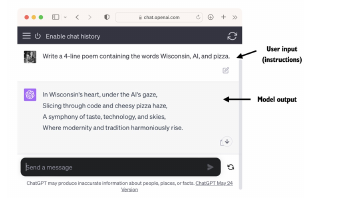
Fig.2 LLM interfaces enable natural language communication between users and AI systems. This screenshot shows ChatGPT writing a poem according to a user's specifications.

# Applications of Large Language Models (LLMs)

## 1.2 Applications of LLMs (Continued)

LLMs, with their advanced capabilities to parse and understand unstructured text data, have a broad range of applications across various domains. Today, LLMs are employed for:

* **Machine translation**
* **Generation of novel texts** (see Figure 1.2 for an example)
* **Sentiment analysis**
* **Text summarization**
* And many other tasks.

LLMs have recently been used for content creation, such as writing fiction, articles, and even computer code.

**Figure 1.2** LLM interfaces enable natural language communication between users and AI systems. This screenshot shows ChatGPT writing a poem according to a user's specifications.

LLMs can also power sophisticated chatbots and virtual assistants, such as OpenAI's ChatGPT or Google's Gemini (formerly called Bard), which can answer user queries and augment traditional search engines such as Google Search or Microsoft Bing.

Moreover, LLMs may be used for effective knowledge retrieval from vast volumes of text in specialized areas such as medicine or law. This includes sifting through documents, summarizing lengthy passages, and answering technical questions.

In short, LLMs are invaluable for automating almost any task that involves parsing and generating text. Their applications are virtually endless, and as we continue to innovate and explore new ways to use these models, it's clear...

# Large Language Models (LLMs): Building and Using

...that LLMs have the potential to redefine our relationship with technology, making it more conversational, intuitive, and accessible. In this book, we will focus on understanding how LLMs work from the ground up, coding an LLM that can generate texts. We will also learn about techniques that allow LLMs to carry out queries, ranging from answering questions to summarizing text, translating text into different languages, and more. In other words, in this book, we will learn how complex LLM assistants such as ChatGPT work by building one step by step.

## Stages of building and using LLMs

Why should we build our own LLMs? Coding an LLM from the ground up is an excellent exercise to understand its mechanics and limitations. Also, it equips us with the required knowledge for pretraining or finetuning existing open-source LLM architectures to our own domain-specific datasets or tasks.

Research has shown that when it comes to modeling performance, custom-built LLMs—those tailored for specific tasks or domains—can outperform general-purpose LLMs, such as those provided by ChatGPT, which are designed for a wide array of applications. Examples of this include BloombergGPT, which is specialized for finance, and LLMs that are tailored for medical question answering (please see the Further Reading and References section in Appendix B for more details).

The general process of creating an LLM includes pretraining and finetuning. The term "pre" in "pretraining" refers to the initial phase where a model like an LLM is trained on a large, diverse dataset to develop a broad understanding of language. This pretrained model then serves as a foundational resource that can be further refined through finetuning, a process where the model is specifically trained on a narrower dataset that is more specific to particular tasks or domains. This two-stage training approach consisting of pretraining and finetuning is depicted in Figure 1.3.

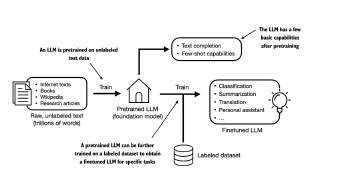

**Fig.3** Pretraining an LLM involves next-word prediction on large text datasets. A pretrained LLM can then be finetuned using a smaller labeled dataset.

# Stages of Building and Using LLMs (Continued)

As illustrated in Figure 1.3, the first step in creating an LLM is to train it on a large corpus of text data, sometimes referred to as raw text. Here, "raw" refers to the fact that this data is just regular text without any labeling information.$^1$ (Filtering may be applied, such as removing formatting characters or documents in unknown languages.)

This first training stage of an LLM is also known as **pretraining**, creating an initial pretrained LLM, often called a base or foundation model. A typical example of such a model is the GPT-3 model (the precursor of the original model offered in ChatGPT). This model is capable of text completion, that is, finishing a half-written sentence provided by a user. It also has limited few-shot capabilities, which means it can learn to perform new tasks based on only a few examples instead of needing extensive training data. This is further illustrated in the next section, *Using transformers for different tasks*.

After obtaining a pretrained LLM from training on large text datasets, where the LLM is trained to predict the next word in the text, we can further train the LLM on labeled data, also known as **finetuning**. The two most popular categories of finetuning LLMs include instruction-finetuning and finetuning for classification tasks.

* In **instruction-finetuning**, the labeled dataset consists of instruction and answer pairs, such as a query to translate a text accompanied by the correctly translated text.
* In **classification finetuning**, the labeled dataset consists of texts and associated class labels, for example, emails associated with spam and non-spam labels.

<br>
$^1$ Note: This implies the raw text data used for pretraining does not have explicit labels like "spam" or "non-spam", but rather the model learns language patterns by predicting the next word.

# LLMs: From Pretraining to Tasks

In this book, we will cover both code implementations for pretraining and finetuning LLMs, and we will delve deeper into the specifics of instruction-finetuning and finetuning for classification later in this book after pretraining a base LLM.

##  Using LLMs for different tasks

Most modern LLMs rely on the **transformer architecture**, which is a deep neural network architecture introduced in the 2017 paper *Attention Is All You Need*. To understand LLMs, we briefly have to go over the original transformer, which was originally developed for machine translation, translating English texts to German and French. A simplified version of the transformer architecture is depicted in Figure 1.4.

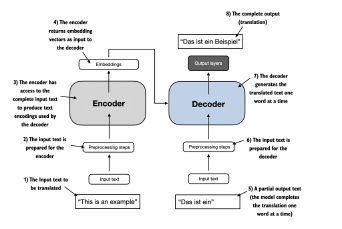

**Fig.4** A simplified depiction of the original transformer architecture, which is a deep learning model for language translation. The transformer consists of two parts: an **encoder** that processes the input text and produces an **embedding representation** (a numerical representation that captures many different factors in different dimensions) of the text that the **decoder** can use to generate the translated text one word at a time. Note that this figure shows the final stage of the translation process where the decoder has to generate only the final word ("Beispiel"), given the original input text ("This is an example") and a partially translated sentence ("Das ist ein"), to complete the translation.

# Transformer Architecture Details

The transformer architecture depicted in Figure 1.4 consists of two submodules, an **encoder** and a **decoder**. The encoder module processes the input text and encodes it into a series of numerical representations or vectors that capture the contextual information of the input. Then, the decoder module takes these encoded vectors and generates the output text from them.

In a translation task, for example, the encoder would encode the text from the source language into vectors, and the decoder would decode these vectors to generate text in the target language. Both the encoder and decoder consist of many layers connected by a so-called **self-attention mechanism**. You may have many questions regarding how the inputs are preprocessed and encoded. These will be addressed in a step-by-step implementation in the subsequent chapters.

A key component of transformers and LLMs is the **self-attention mechanism** (not shown), which allows the model to weigh the importance of different words or tokens in a sequence relative to each other. This mechanism enables the model to capture long-range dependencies and contextual relationships within the input data, enhancing its ability to generate coherent and contextually relevant output. However, due to its complexity, we will defer the explanation to Chapter 3, where we will discuss and implement it step by step.

# Transformer Variants and Their Applications

...step. Moreover, we will also discuss and implement the data preprocessing steps to create the model inputs in Chapter 2, *Working with Text Data*.

Later variants of the transformer architecture, such as the so-called **BERT** (short for bidirectional encoder representations from transformers) and the various **GPT models** (short for generative pretrained transformers), built on this concept to adapt this architecture for different tasks. (References can be found in Appendix B.)

BERT, which is built upon the original transformer's encoder submodule, differs in its training approach from GPT. While GPT is designed for generative tasks, BERT and its variants specialize in masked word prediction, where the model predicts masked or hidden words in a given sentence as illustrated in Figure 1.5. This unique training strategy equips BERT with strengths in text classification tasks, including sentiment prediction and document categorization. As an application of its capabilities, as of this writing, Twitter uses BERT to detect toxic content.
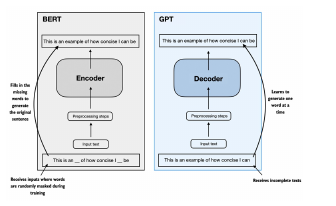

**Fig.5** A visual representation of the transformer's encoder and decoder submodules. On the left, the encoder segment exemplifies BERT-like LLMs, which focus on masked word prediction and are primarily used for tasks like text classification. On the right, the decoder segment showcases GPT-like LLMs, designed for generative tasks and producing coherent text sequences.

In [ ]:
# Conceptual Python Code for Transformer Variants

The previous text describes the functionalities of BERT (masked word prediction, text classification) and GPT (text generation). While actual implementations involve complex deep neural networks and extensive libraries, we can conceptualize their core ideas with simplified Python functions.

## 1. Data Preprocessing (Conceptual)

Before feeding text into any LLM, it needs to be preprocessed, often involving tokenization (breaking text into words/subwords) and converting them into numerical IDs.

```python
import random

def simple_tokenize(text):
    """
    A very basic conceptual tokenizer.
    In reality, this involves vocabulary lookups,
    special tokens (CLS, SEP, PAD), etc.
    """
    return text.lower().split()

def text_to_ids(tokens, vocab_map):
    """
    Converts tokens to conceptual numerical IDs.
    """
    return [vocab_map.get(token, vocab_map['[UNK]']) for token in tokens]

# --- Example Usage ---
sample_text = "This is an example sentence about Transformers"
concept_vocab = {
    'this': 1, 'is': 2, 'an': 3, 'example': 4, 'sentence': 5,
    'about': 6, 'transformers': 7, '[UNK]': 0, '[CLS]': 8, '[SEP]': 9, '[MASK]': 10
}

tokens = simple_tokenize(sample_text)
token_ids = text_to_ids(tokens, concept_vocab)

print(f"Original Text: '{sample_text}'")
print(f"Conceptual Tokens: {tokens}")
print(f"Conceptual Token IDs: {token_ids}")

# In a real scenario, embeddings would be learned numerical vectors for these IDs.
# For simplicity, we'll just show the IDs.


def conceptual_masked_prediction(sentence_tokens, vocab_map, mask_token='[MASK]'):
    """
    A conceptual function illustrating masked word prediction.
    It "predicts" a masked word based on a predefined simple rule,
    not actual model inference.
    """
    if mask_token not in sentence_tokens:
        return "No mask token found."

    masked_index = sentence_tokens.index(mask_token)
    
    # Simulate a "prediction" based on simple context
    # This is *not* how a real BERT model predicts; it uses complex neural nets.
    if masked_index > 0 and sentence_tokens[masked_index - 1] == 'an':
        return "example"
    elif masked_index < len(sentence_tokens) - 1 and sentence_tokens[masked_index + 1] == 'is':
        return "this"
    else:
        # A real model would output probabilities over the entire vocabulary
        possible_words = [k for k, v in vocab_map.items() if k not in ['[UNK]', '[CLS]', '[SEP]', '[MASK]']]
        return random.choice(possible_words) # Random guess for generic case

# --- Example Usage ---
sentence1 = ['this', 'is', 'an', '[MASK]', 'sentence']
sentence2 = ['[MASK]', 'is', 'an', 'example', 'sentence']
sentence3 = ['hello', 'world', '[MASK]']

print(f"\nConceptual BERT-like Masked Prediction:")
print(f"Sentence: {sentence1} -> Predicted Mask: '{conceptual_masked_prediction(sentence1, concept_vocab)}'")
print(f"Sentence: {sentence2} -> Predicted Mask: '{conceptual_masked_prediction(sentence2, concept_vocab)}'")
print(f"Sentence: {sentence3} -> Predicted Mask: '{conceptual_masked_prediction(sentence3, concept_vocab)}'")


def conceptual_text_generation(prompt_tokens, max_length=10):
    """
    A conceptual function illustrating text generation.
    It "generates" words based on very simple, hardcoded sequences,
    not actual model inference.
    """
    generated_text_tokens = list(prompt_tokens)
    
    # Simulate generation based on the last token
    # A real GPT model uses complex attention and probability distributions.
    generation_rules = {
        'hello': ['world', 'how', 'are', 'you'],
        'the': ['cat', 'dog', 'sun'],
        'an': ['apple', 'orange', 'idea'],
        'this': ['is', 'a', 'very'],
        'is': ['a', 'good', 'day']
    }

    for _ in range(max_length - len(prompt_tokens)):
        last_token = generated_text_tokens[-1]
        next_possible_words = generation_rules.get(last_token.lower(), ['random', 'word'])
        
        next_word = random.choice(next_possible_words)
        generated_text_tokens.append(next_word)
        
        # Stop if a "period" or end-like word is generated (conceptual)
        if next_word in ['day', 'you', 'idea']:
            break

    return ' '.join(generated_text_tokens)

# --- Example Usage ---
prompt1 = ['hello']
prompt2 = ['this', 'is']
prompt3 = ['the']

print(f"\nConceptual GPT-like Text Generation:")
print(f"Prompt: '{' '.join(prompt1)}' -> Generated: '{conceptual_text_generation(prompt1, max_length=5)}'")
print(f"Prompt: '{' '.join(prompt2)}' -> Generated: '{conceptual_text_generation(prompt2, max_length=7)}'")
print(f"Prompt: '{' '.join(prompt3)}' -> Generated: '{conceptual_text_generation(prompt3, max_length=6)}'")


